</div>
<center>
<div class="figure" >
  <img src="https://www.ufpb.br/educacaofinanceira/contents/imagens/brasoes-universidades/ufpa.png/@@images/image.png" width="8%">
</div>
<center/>
</div>



Universidade Federal do Pará\
Campus Universitário de Tucuruí\
Faculdade de Engenharia Elétrica\
Disciplina de Laboratório de controle - 2023.2\
Turma: T03



Coordenador: Cleison Silva

<br>

Alunos:

Andrez Muller Miranda Barreto\
Matrícula: 201833940007

Oséias Dias de Farias\
Matrícula: 201733940002

Thalia Damasceno Barroso\
Matrícula: 201633940040

<br>

___

## **Projeto de controladores P e PI para Planta (Motor Gerador) usando o modelo identificado por PRBS de segunda ordem em torno de um ponto de operação**


<center>
<div class="figure" >
  <p>Figura 1 - Bancada Motor/Gerador.</p>
  <img src="https://github.com/Oseiasdfarias/lab_control/blob/main/Resposta%20Sistema%20de%20Primeira%20Ordem/Figuras/sistema_gerador_motor.jpeg?raw=true"
       width="55%"> 
  <p>Fonte - Autor.</p>
</div>
<center/>

# **Sistema de Controle em Malha Fechada**

O diagrama de blocos abaixo, ilustra o esquema básico de sistemas de controle em malha fechada com realimentação negativa. No esquema, destaca-se $4$ sinais principais:  o sinal de referência $r(t)$, o sinal de erro de controle $e(t)$, o sinal de controle $u(t)$ e o sinal de saída $y(t)$.

Tem-se também, dois sistemas em destaque, o **processo**, representando a dinâmica a ser controlada e o **controlador**. 

Nesse experimento, o objetivo é realizar o projeto, simulação e implementação dos controladores Proporcional (P) e e Proporcional-Integral (PI) para a bancada Motor-gerador.

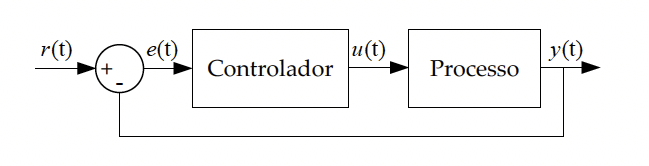

# **Planta encontrada usando Identificação de sistema**

<br>

$$
    H(z) = \frac{0,01043z + 0,02695}{z^{2} - 0,7791z - 0,09974} \quad dt=0.019999999999999657
$$

# **Simulação do Sistema em Malha Fechada**

In [835]:
# !pip install control -q

In [836]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import control as ct
from scipy.signal import square
from control.matlab import *

%config InlineBackend.figure_format='retina'

### Dados do ensaio

In [837]:
dados_prbs_malha_aberta = pd.read_csv("../prbs_ma_7_5_v2.csv", sep=";", header = None).values
dados_prbs_malha_aberta

array([[0.000e+00, 7.500e+00, 0.000e+00],
       [2.000e-02, 7.500e+00, 0.000e+00],
       [4.000e-02, 7.500e+00, 1.900e-01],
       ...,
       [2.042e+01, 8.500e+00, 2.470e+00],
       [2.044e+01, 8.500e+00, 2.490e+00],
       [2.046e+01, 8.500e+00, 2.500e+00]])

In [838]:
# Dados
tempo_ensaio = np.array(dados_prbs_malha_aberta[:, 0])
sinal_entrada_ensaio  = np.array(dados_prbs_malha_aberta[:, 1])
sinal_saida_ensaio = np.array(dados_prbs_malha_aberta[:, 2])

Ts = 0.02
print('\nPeriodo de Amostragem:', Ts)


Periodo de Amostragem: 0.02


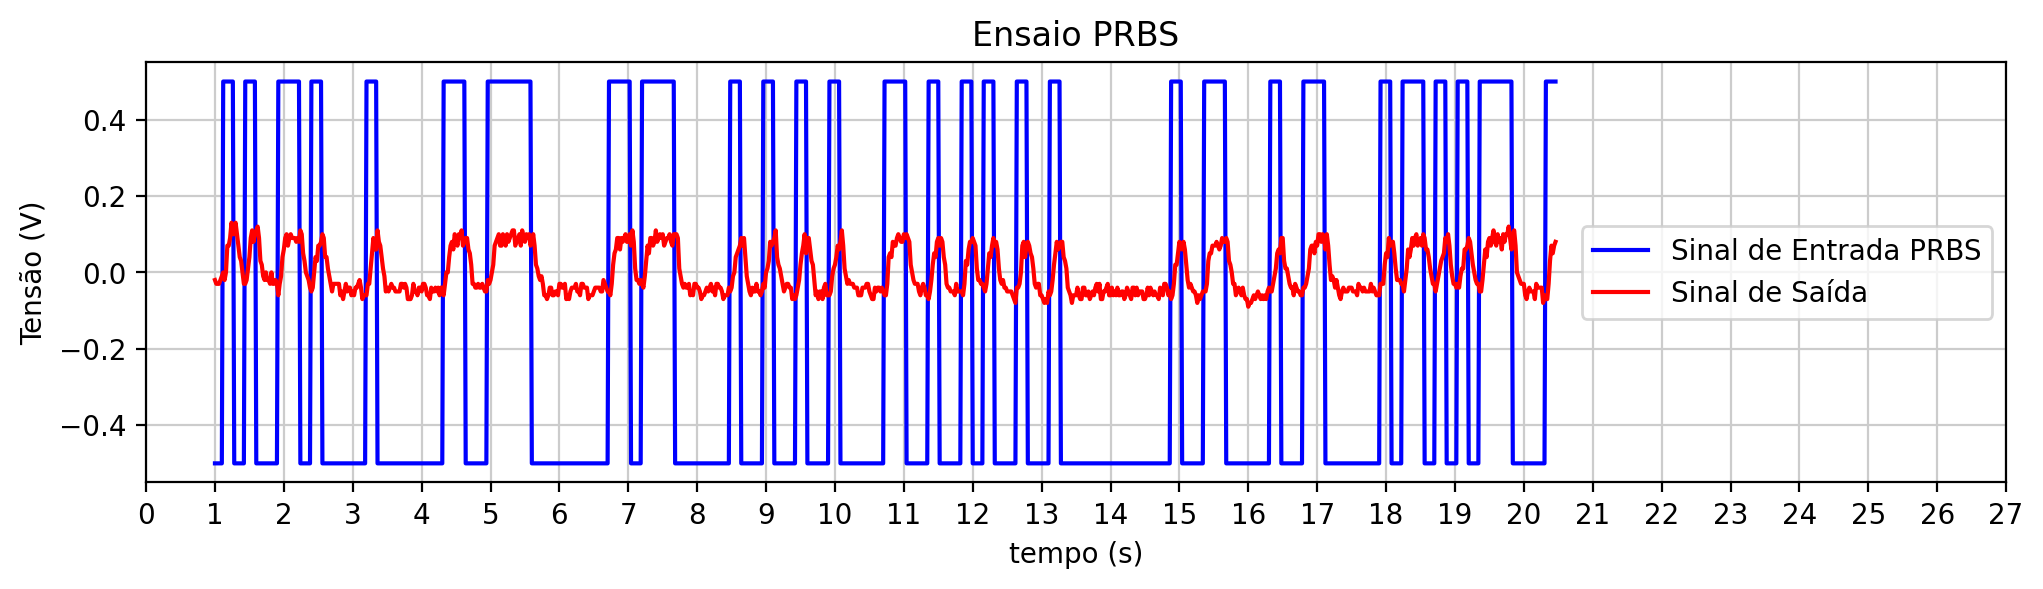

In [839]:

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(tempo_ensaio[50:],
         sinal_entrada_ensaio[50:] - 8, c = 'b',
         label = "Sinal de Entrada PRBS")
plt.plot(tempo_ensaio[50:],
         sinal_saida_ensaio[50:] - (np.mean(sinal_saida_ensaio[50:])),
         c = 'r', label = "Sinal de Saída")
plt.xticks(range(0, 28))

plt. title('Ensaio PRBS', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10, loc="center right")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

In [840]:
dt=0.019999999999999657

num_g = [0.01043, 0.02695]
den_g = [1, -0.7791, -0.09974]

Gz = ct.tf(num_g, den_g, dt)
Gz

TransferFunction(array([0.01043, 0.02695]), array([ 1.     , -0.7791 , -0.09974]), 0.019999999999999657)

In [841]:
K = 0.5

H = ct.feedback(K*Gz, 1, sign=-1)
C = ct.feedback(K, Gz, sign=-1)

_, saida_yg = ct.forced_response(Gz, U=sinal_entrada_ensaio)
_, saida_yh = ct.forced_response(H, T=tempo_ensaio,
                                 U=sinal_entrada_ensaio)
_, saida_yc = ct.forced_response(C, T=tempo_ensaio,
                                 U=sinal_entrada_ensaio)

In [842]:
def plot_saida(saida_ensaio, saida_simu):
    plt.figure(figsize=(12, 6))
    plt.subplot(211)
    plt.plot(tempo_ensaio[50:],
            saida_ensaio[50:] - (np.mean(saida_ensaio[50:])),
            c = 'r', label = "Sinal de Saída")
    plt.plot(tempo_ensaio[50:], saida_simu[50:]- (np.mean(saida_simu[50:])),
            c = 'b', label = "Sinal de Saída")

    plt. title('Ensaio PRBS', fontsize=12)
    plt.ylabel('Tensão (V)', fontsize=10)
    plt.xlabel('tempo (s)', fontsize=10)
    plt.legend(fontsize=10, loc="center right")

    plt.grid(which='both')
    plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
    plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

    plt.show()

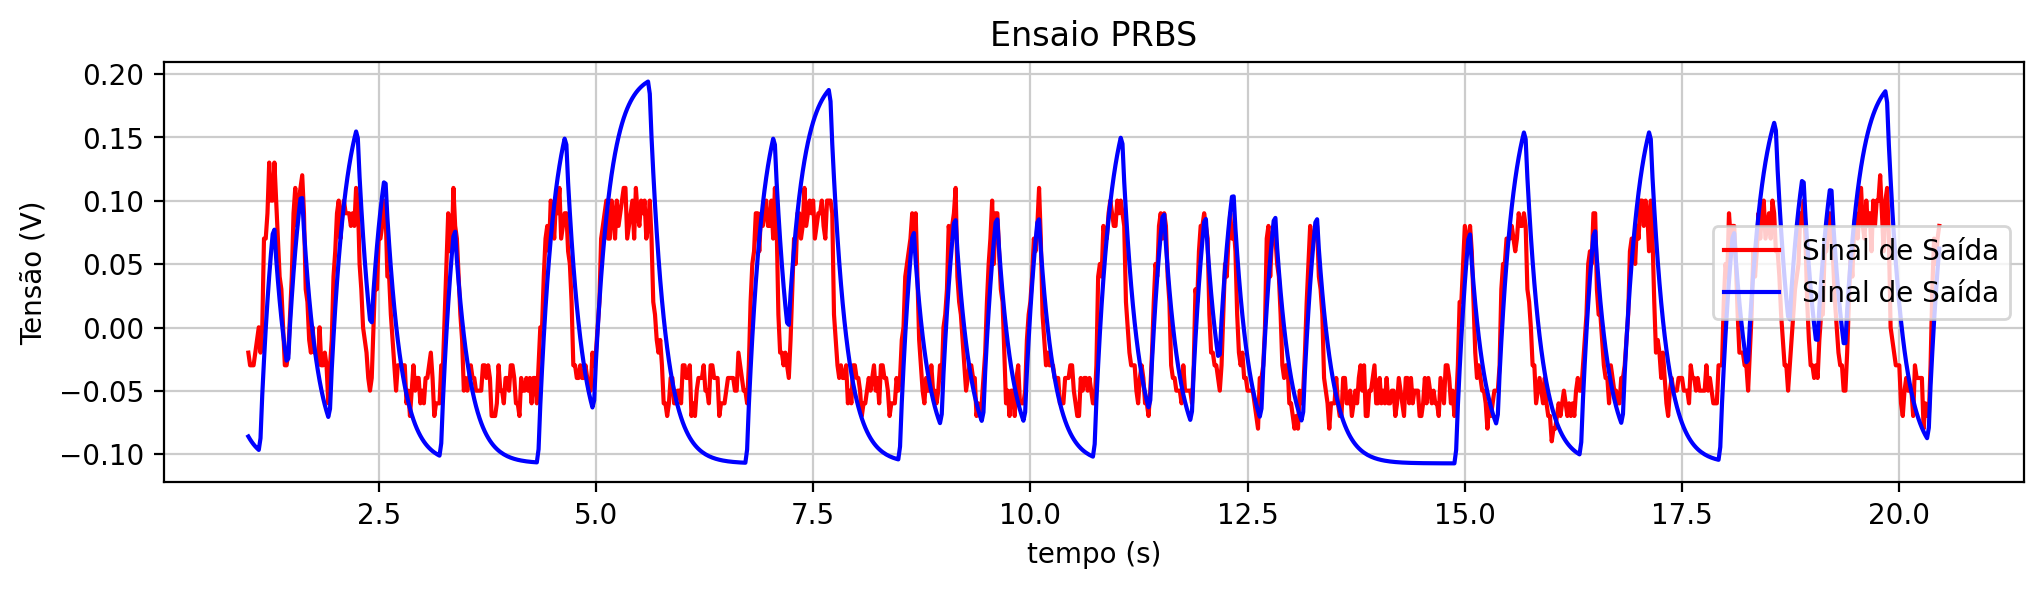

In [843]:
plot_saida(sinal_saida_ensaio, saida_yg)

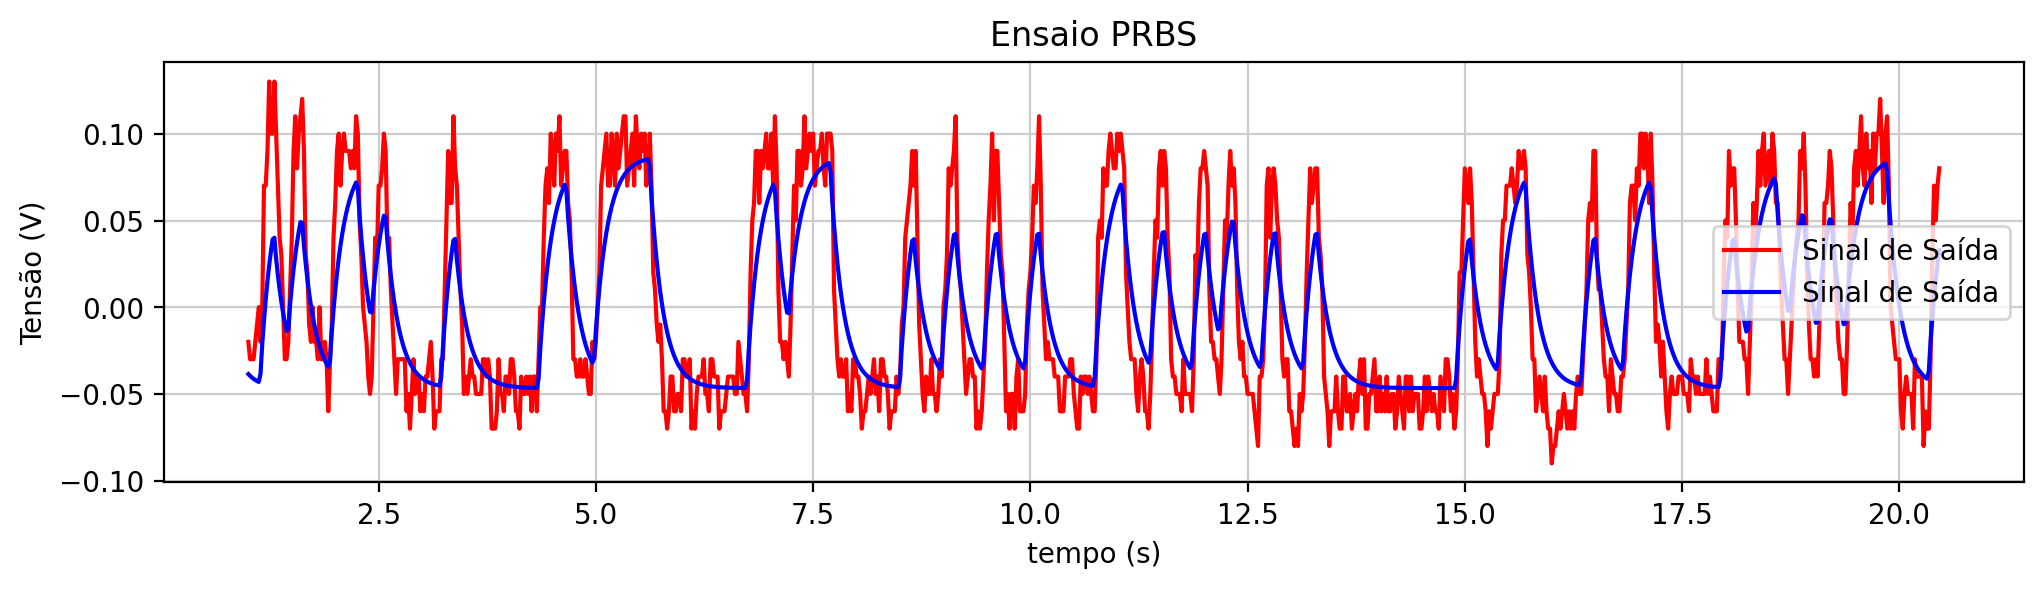

In [844]:
plot_saida(sinal_saida_ensaio, saida_yh)

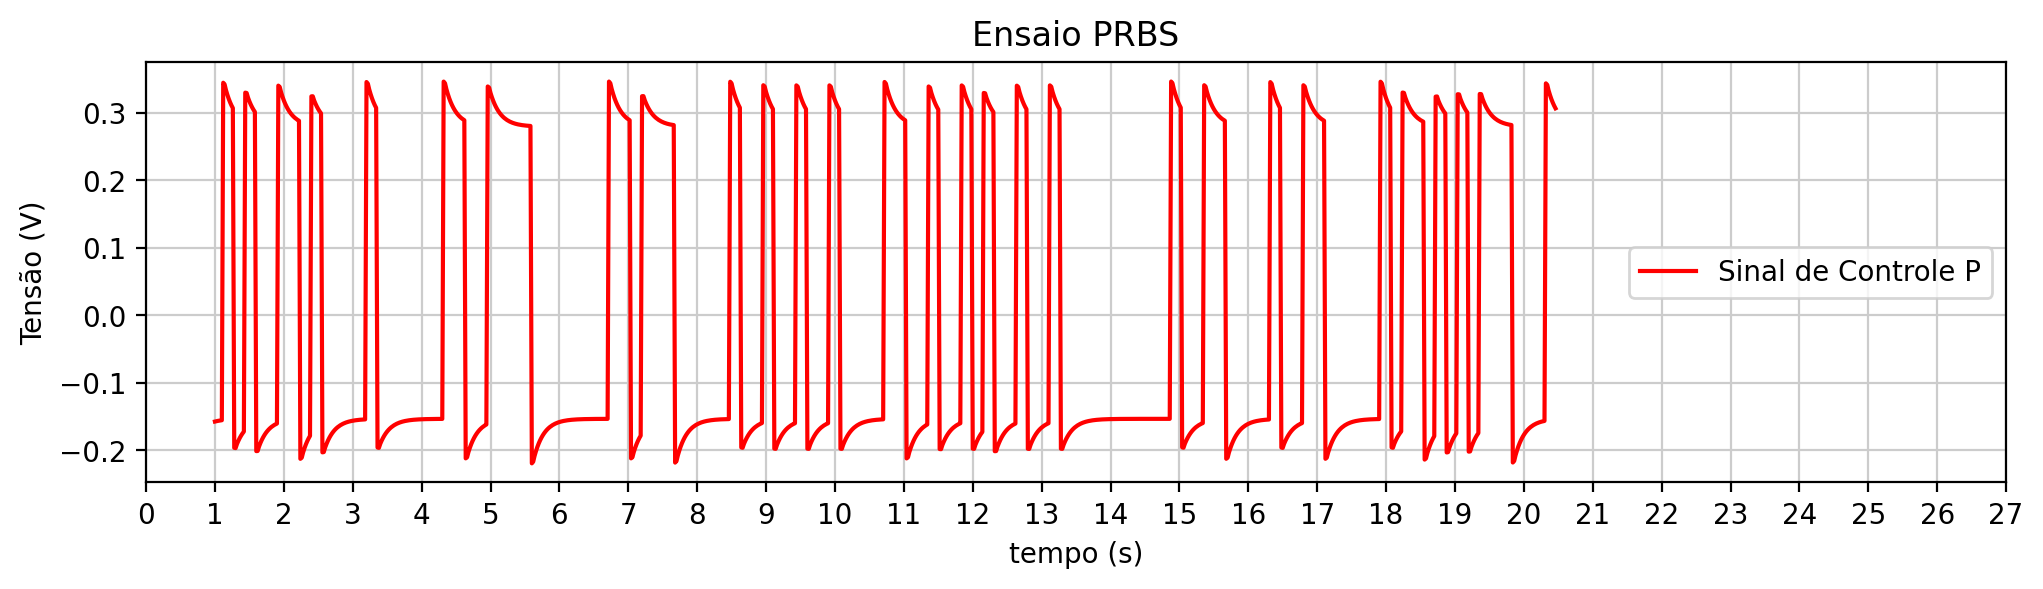

In [845]:

plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(tempo_ensaio[50:],
         saida_yc[50:] - (np.mean(saida_yc[50:])),
         c = 'r', label = "Sinal de Controle P")
plt.xticks(range(0, 28))

plt. title('Ensaio PRBS', fontsize=12)
plt.ylabel('Tensão (V)', fontsize=10)
plt.xlabel('tempo (s)', fontsize=10)
plt.legend(fontsize=10, loc="center right")

plt.grid(which='both')
plt.grid(which='major', color='#CCCCCC', linestyle='-', alpha=1)
plt.grid(which='minor', color='#CCCCCC', linestyle=':', alpha=0.5)

plt.show()

# **Lugar Geométrico das Raízes - LGR**

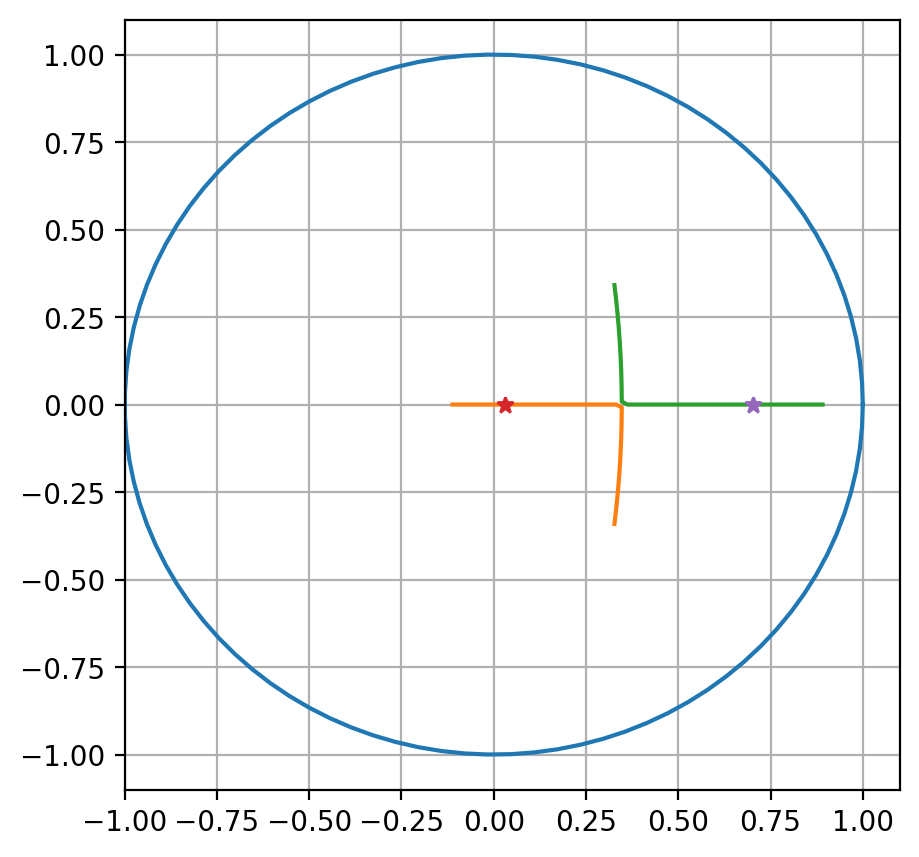

In [846]:
kvect = np.arange(0,12,0.01)
rlist,_ = ct.rlocus(Gz, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
K = 4.5
plt.figure(figsize=(5, 5))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

---

# **Projeto do Controlador PI**

Função de Transferência de malha aberta:

$$ G(s) = \dfrac{K_m}{\tau s + 1} = \dfrac{K  b}{s + b} \tag{A}$$


Em que, 
$K = K_m$ e 
$b = \dfrac{1}{\tau}$

Função de Transferência de Controlador PI:

$$ G_c (s) = \dfrac{K_c (s + a)}{s} \tag{B}$$


Em malha fechada:

$$ H(s) = \dfrac{G_c(s) G(s)}{1 + G_c(s) G(s)} \tag{C}$$


Substituindo ($A$) e ($B$) e ($C$), tem-se 

$$ \dfrac{\dfrac{K_c (s + a)}{s} \dfrac{K  b}{s + b} }{1 + \dfrac{K_c (s + a)}{s} \dfrac{K  b}{s + b}} $$

Resulta em, 

$$
    H(s) =  \dfrac{K_c K b (s + a)}{s(s+b) + K_c K b (s + a)}
$$ 

$$
    H(s) =  \dfrac{K_c K b (s + a)}{s^2 + (b + K_c K b)s + K_c K b a}  \tag{D}
$$

<br>

Com o controlador PI na malha, o tipo do sistema passa a ser Tipo 1 (erro em regime permanente nulo para entrada degrau). 


Os parâmetros $K$ e $b$ são conhecidos a partir do modelo do sistema em malha aberta.

Um abordagem para o projeto do controlador PI consiste em comparar a função de transferência em (D) com uma função de transferência padronizada de referência.

$$
    H_{ref}(s) =  \dfrac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2 } \tag{E}
$$

em que os polos são parametrizados por $\zeta$ e $\omega_n$.

Assim, as especificações de desempenho do sistema em malha fechada podem ser traduzidas em valores de $\zeta$ e $\omega_n$. Tal que,

1. **Ultrapassagem percentual** ($\% UP$):

$$ 
    \% UP = 100 \times e^{\dfrac{-\zeta \pi}{\sqrt{1-\zeta^2}}} \zeta = \dfrac{-\ln(\% UP / 100)}{\sqrt{\pi^2 + \ln^2(\% UP / 100)}}
$$

2. **Instante de pico**:

$$ 
    T_p = \dfrac{\pi}{\omega_d}
$$

em que $\omega_d = \omega_n \sqrt{1-\zeta^2}$.

3. **Tempo de assentamento**: Instante em que a resposta do sistema alcança e permanence dentro da faixa de $2\%$ em torno do valor de regime permanente.

$$ T_s = \dfrac{4}{\sigma}$$

Para o critério de $1\%$, considere,

$$T_s = \dfrac{4,6}{\sigma}$$

em que  $\sigma = \zeta  \omega_n$.
1. **Tempo de subida**: tempo necessário para que a forma de onda vá de $0.1$ a $0.9$ do valor final.

$$ T_r ≈ \dfrac{1,8}{\omega_n}$$




A Figura (retirado do Frankin and Powell) ilustra a reposta de um sistema de segunda ordem subamortecido. Com destaque para as especificações de desempenho.

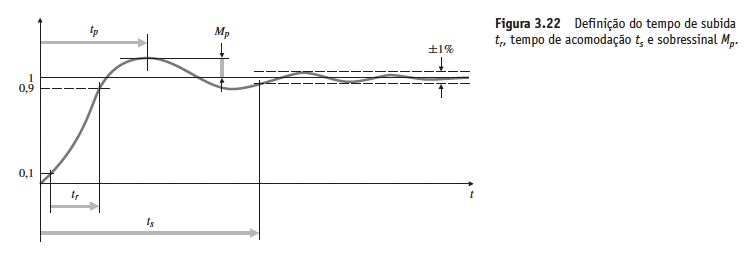

Plano Complexo, com destque para a localização de um par de polos complexos conjugados, parametrizados por $\zeta$ e $\omega_n$.   

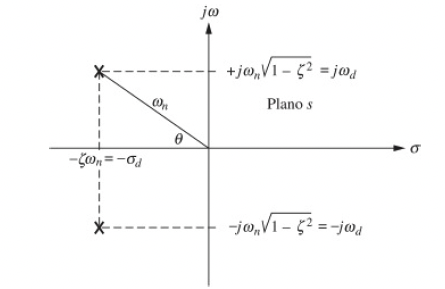

In [847]:
ct.damp(Gz);

    Eigenvalue (pole)       Damping     Frequency
                0.891             1         5.768
              -0.1119             1         191.5


In [848]:
ct.step_info(Gz)

{'RiseTime': 0.3799999999999935,
 'SettlingTime': 0.699999999999988,
 'SettlingMin': 0.27910922291448004,
 'SettlingMax': 0.30851766259491686,
 'Overshoot': 3.238714807309405e-13,
 'Undershoot': 0,
 'Peak': 0.30851766259491686,
 'PeakTime': 5.959999999999898,
 'SteadyStateValue': 0.30851766259491586}

In [849]:
#___________ Especificações de desempenho _________
UP = 5      # Ultrapassagem percentual em %
Ta = 0.55

qsi = -np.log(UP/100)/(np.sqrt(np.pi**2 + np.log(UP/100)**2))
print("Fator de amortecimento: ", qsi)

wn = 4/(qsi*Ta)
print("Frequencia natural: ", wn)

Fator de amortecimento:  0.6901067305598217
Frequencia natural:  10.53855432887542


$$
    H_{ref}(s) =  \dfrac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2 } \tag{E}
$$

In [850]:
num = [wn**2]
den = [1, 2*qsi*wn, wn**2]

Gc = ct.tf(num, den)

Gc

TransferFunction(array([111.06112734]), array([  1.        ,  14.54545455, 111.06112734]))

In [851]:
G_add = ct.tf([1], [1, 50])
G_add

TransferFunction(array([1]), array([ 1, 50]))

In [852]:
G_desejado = Gc*G_add
G_desejado

TransferFunction(array([111.06112734]), array([1.00000000e+00, 6.45454545e+01, 8.38333855e+02, 5.55305637e+03]))

In [853]:
ct.damp(G_desejado);

    Eigenvalue (pole)       Damping     Frequency
                  -50             1            50
    -7.273    +7.627j        0.6901         10.54
    -7.273    -7.627j        0.6901         10.54


In [854]:
G_desejado_z = ct.c2d(G_desejado, dt)
G_desejado_z

TransferFunction(array([1.08713898e-04, 3.19701000e-04, 5.71039437e-05]), array([ 1.        , -2.0770591 ,  1.3763557 , -0.27502065]), 0.019999999999999657)

In [855]:
Gc = ct.c2d(Gc, dt)
Gc

TransferFunction(array([0.02013306, 0.01827092]), array([ 1.        , -1.70917966,  0.74758364]), 0.019999999999999657)

### **Controlador PI**

In [857]:
K = 29.17
a = 9.31
Gpi = ct.tf([K, K*a], [1, 0])
Gpi

Gpi = ct.c2d(Gpi,dt,'tustin')
Gpi

TransferFunction(array([ 31.885727, -26.454273]), array([ 1., -1.]), 0.019999999999999657)

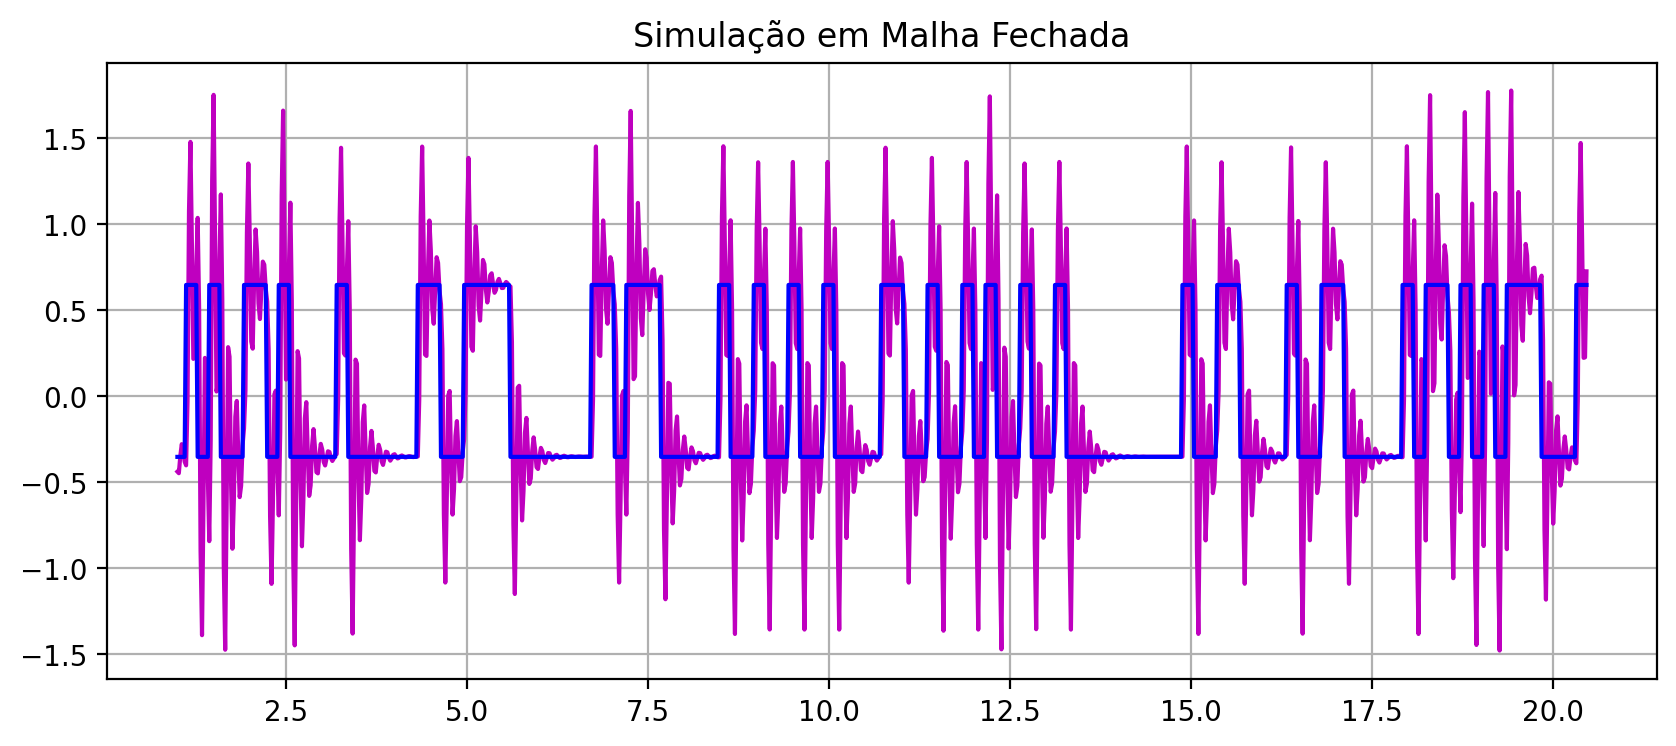

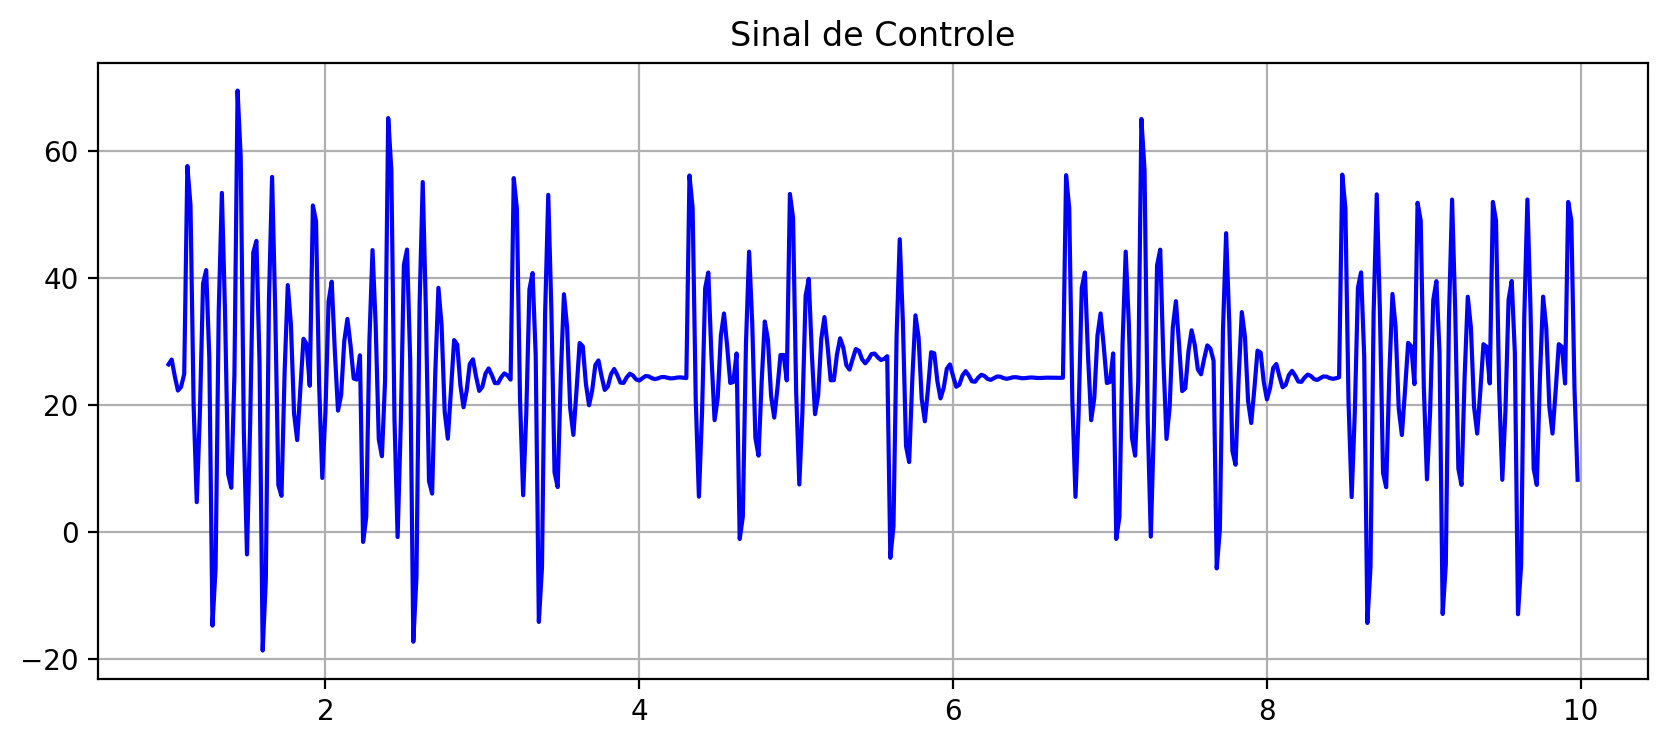

In [858]:

H_pi = ct.feedback(Gpi*Gz, 1, sign = -1)
C_pi = ct.feedback(Gpi, Gz, sign = -1)

_, ymf_pi = ct.forced_response(H_pi, T = tempo_ensaio, U = sinal_entrada_ensaio)
_, u_pi = ct.forced_response(C_pi, T = tempo_ensaio, U = sinal_entrada_ensaio)

plt.figure(figsize=(10, 4))
# plt.plot(tempo,ym,'k' ,tempo,y,'r')
plt.plot(tempo_ensaio[50:], ymf_pi[50:]-np.mean(ymf_pi[50:]), 'm')
plt.plot(tempo_ensaio[50:],
         sinal_entrada_ensaio[50:]-np.mean(sinal_entrada_ensaio[50:]),'b')
plt.title("Simulação em Malha Fechada")
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(tempo_ensaio[50:500], u_pi[50:500], 'b')
plt.title("Sinal de Controle")
plt.grid()
plt.show()

In [859]:
""

import serial
import numpy as np
import matplotlib.pyplot as plt
import time as t
from scipy.signal import square, sawtooth


##########################################

numAmostras = 600
tempo = np.zeros(numAmostras)
y = np.zeros(numAmostras)

Ts = 0.02

fre = 0.5
Amplitude = 1.0
setpoint = 7.5
r = np.zeros(numAmostras)
toc = np.zeros(numAmostras)
######################


for n in range(numAmostras):
    r[n] = Amplitude*square(2*np.pi*fre*n*Ts) + setpoint

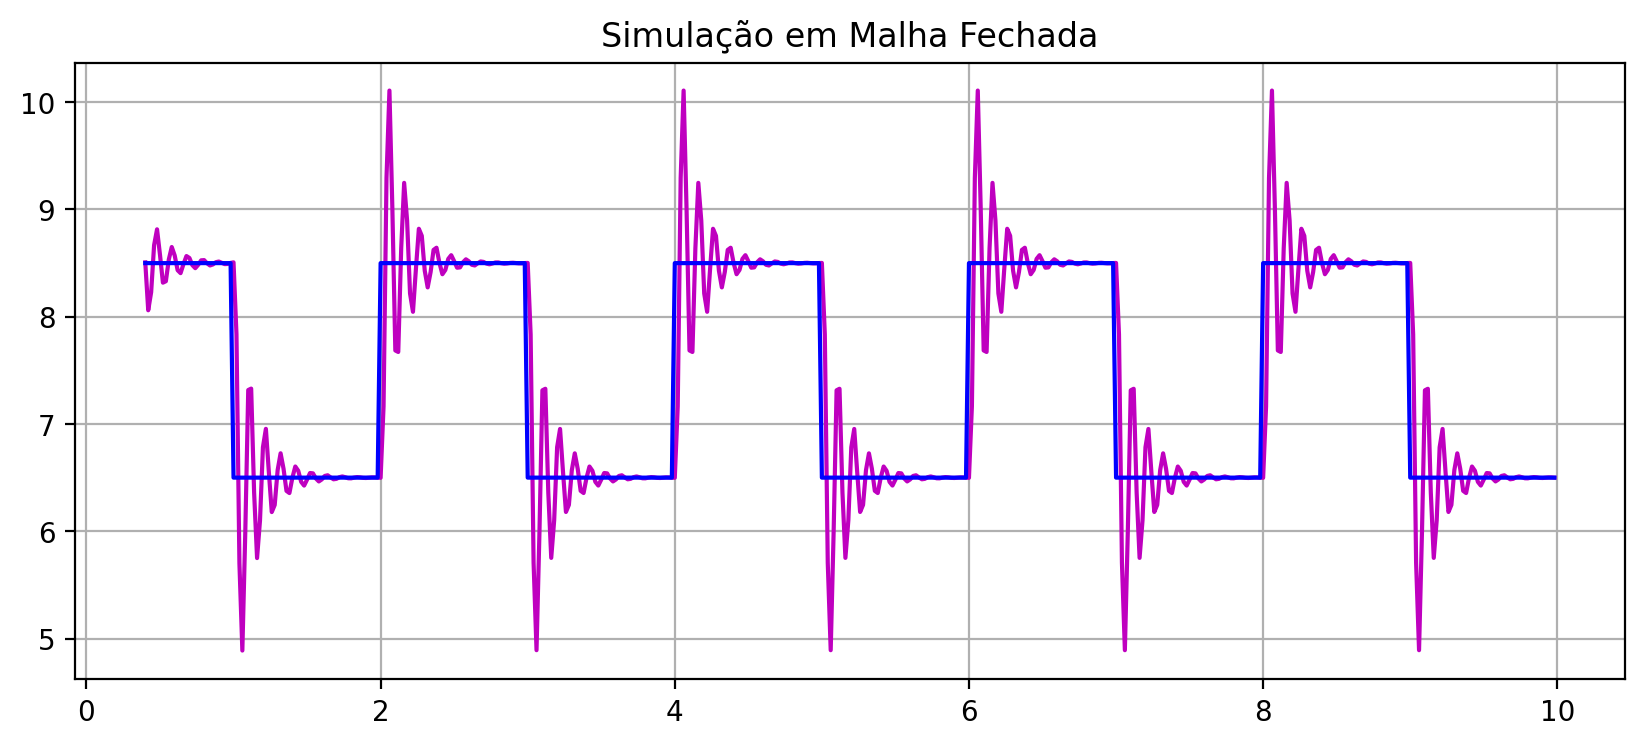

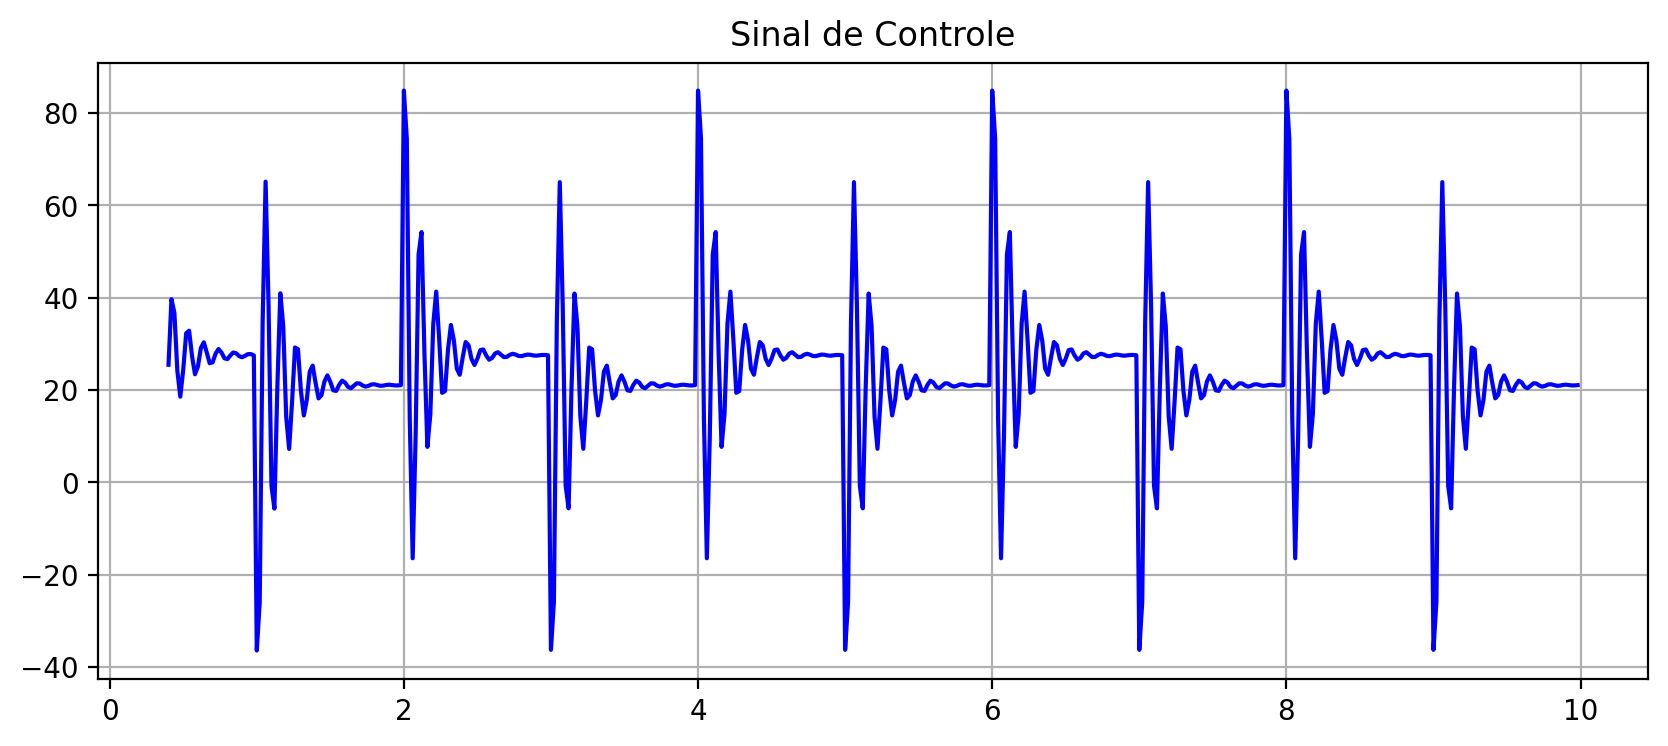

In [860]:

H_pi = ct.feedback(Gpi*Gz, 1, sign = -1)
C_pi = ct.feedback(Gpi, Gz, sign = -1)

t, ymf_pi = ct.forced_response(H_pi, U = r)
t1, u_pi = ct.forced_response(C_pi, U = r)

plt.figure(figsize=(10, 4))
# plt.plot(tempo,ym,'k' ,tempo,y,'r')
plt.plot(t[20:500], ymf_pi[20:500], 'm')
plt.plot(t[20:500], r[20:500], 'b')
plt.title("Simulação em Malha Fechada")
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t1[20:500], u_pi[20:500], 'b')
plt.title("Sinal de Controle")
plt.grid()
plt.show()

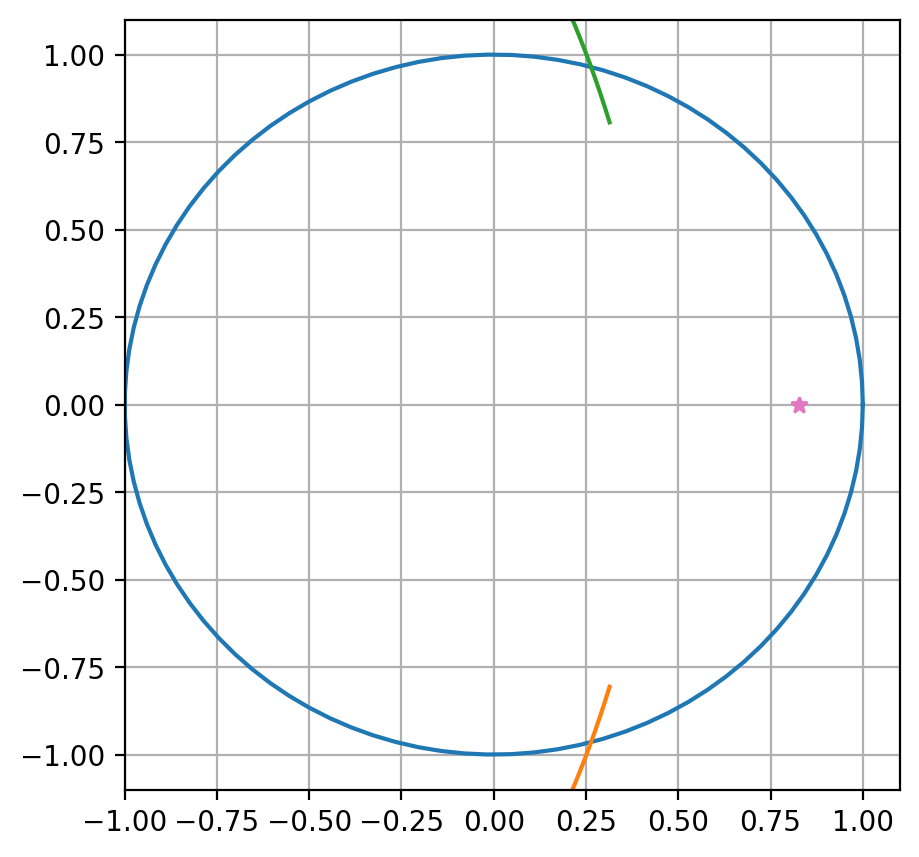

In [861]:
kvect = np.arange(0,12,0.01)
rlist,_ = ct.rlocus(H_pi, kvect=kvect, plot = False)

teta = np.linspace(0,2*np.pi,100)
K = 4.5
plt.figure(figsize=(5, 5))
plt.plot(np.cos(teta),np.sin(teta))
plt.plot(np.real(rlist[:]),np.imag(rlist[:]))
plt.plot(np.real(rlist[kvect==K]),np.imag(rlist[kvect==K]), '*')
plt.axis([-1,1.1,-1.1,1.1])
plt.grid()
plt.show()

In [862]:
Gpi

TransferFunction(array([ 31.885727, -26.454273]), array([ 1., -1.]), 0.019999999999999657)

$$\frac{U(z)}{E(z)} = \frac{b_0 z + b_1}{z - 1} \frac{z^{-1}}{z^{-1}} $$


Equação de Diferenças:

$$ u(k) = u(k-1) + b_0 e(k) + b_1 e(k-1)$$

$$ u(k) = u(k-1) + 31,89 e(k) - 26,45e(k-1)$$



$$ $$

## Conclusão

Portanto, foi possível projetar os controladores Proporcional e Proporcional Integral para a planta identificada, além disso, plotou-se os gráficos do sinal de saída e de controle para ambos os controladores, a resposta do sistema em malha fechada para o controlador Proporcional manteve as caracteristicas do sistema, alterando apenas a constante de tempo e o ganho, sem zerar o erro em regime permanente, já a resposta do controlador PI zerou o erro em regime pernamente além de alterar o K e O $\tau$ do sistema. 